In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
train_2008 = pd.read_csv('./train_clean/train_clean_2008.csv')
test_2008 = pd.read_csv('./test_clean/test_clean_2008.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_2008.head()

,PID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,OWN_OCC,OWNER,...,U_AC,U_FPLACE,AV_BLDG,GROSS_TAX,AV_LAND,AV_TOTAL,U_KITCH_TYPE,STRUCTURE_CLASS,LatLong,GIS_ID
0,0100001000_,195,LEXINGTON,ST,0,2128.0,105,R3,Y,PASCUCCI CARLO,...,N,0.0,265500,400624,99700,365200,0,R,nan|nan,1102128015_
1,0100002000_,197,BROOKLINE,AV,0,2128.0,105,R3,N,"ATANASOV, DANIEL",...,N,0.0,340300,474014,91800,432100,0,R,nan|nan,1702569000_
2,0100003000_,199,LEXINGTON,ST,0,2128.0,105,R3,N,GUERRA ANA S,...,N,0.0,302300,432437,91900,394200,0,R,42.2721229397|-71.0779526633,1800079000_
3,0100004000_,201,LEXINGTON,ST,0,2128.0,105,R3,N,"MADDALENI JAMES E, TS",...,N,0.0,315000,446479,92000,407000,0,R,42.268792190700005|-71.0926506592,1801014000_
4,0100005000_,203,LEXINGTON,ST,0,2128.0,104,R2,Y,DIGIROLAMO JOHN F TS,...,N,0.0,241500,387022,111300,352800,0,R,42.2701646032|-71.1030902067,1802070000_


In [5]:
train_2008.describe().T

,count,mean,std,min,25%,50%,75%,max
ZIPCODE,119727.0,2128.640206,2.856716e+02,0.0,2119.000000,2127.000000,2131.000000,9.822100e+04
PTYPE,119727.0,203.994195,2.622867e+02,10.0,102.000000,102.000000,105.000000,9.950000e+02
LAND_SF,119727.0,9175.377960,3.237362e+05,0.0,1044.212711,2433.000000,5000.000000,1.015968e+08
YR_BUILT,119727.0,1927.003592,5.501321e+02,1700.0,1900.000000,1920.000000,1935.000000,1.919000e+05
YR_REMOD,119727.0,1996.235076,7.415465e+01,1890.0,1996.000000,2000.000000,2000.000000,2.000300e+04
GROSS_AREA,119727.0,4185.289723,2.637777e+04,0.0,660.000000,1836.000000,3892.000000,2.082040e+06
LIVING_AREA,119727.0,3243.478436,2.439609e+04,0.0,658.000000,1306.000000,2448.000000,2.034730e+06
NUM_FLOORS,119727.0,1.723289,1.341578e+00,0.0,1.000000,2.000000,2.000000,5.000000e+01
R_TOTAL_RMS,119727.0,10.068624,2.393041e+00,1.0,10.068780,10.068780,10.068780,8.000000e+01
R_BDRMS,119727.0,1.859781,2.561242e+00,0.0,0.000000,0.000000,4.000000,1.600000e+01


In [6]:
train_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 55 columns):
PID                119727 non-null object
ST_NUM             119727 non-null object
ST_NAME            119727 non-null object
ST_NAME_SUF        119727 non-null object
UNIT_NUM           119727 non-null object
ZIPCODE            119727 non-null float64
PTYPE              119727 non-null int64
LU                 119727 non-null object
OWN_OCC            119727 non-null object
OWNER              119727 non-null object
MAIL_ADDRESS       119727 non-null object
MAIL CS            119727 non-null object
MAIL_ZIPCODE       119727 non-null object
LAND_SF            119727 non-null float64
YR_BUILT           119727 non-null float64
YR_REMOD           119727 non-null float64
GROSS_AREA         119727 non-null float64
LIVING_AREA        119727 non-null float64
NUM_FLOORS         119727 non-null float64
R_BLDG_STYL        119727 non-null object
R_ROOF_TYP         119727 non-null object
R

In [7]:
train_2008.AV_TOTAL.describe()

count    1.197270e+05
mean     7.283801e+05
std      6.645642e+06
min      0.000000e+00
25%      2.293000e+05
50%      3.561000e+05
75%      4.867000e+05
max      7.571455e+08
Name: AV_TOTAL, dtype: float64

In [171]:
train_2008.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'UNIT_NUM', 'ZIPCODE',
       'PTYPE', 'LU', 'OWN_OCC', 'OWNER', 'MAIL_ADDRESS', 'MAIL CS',
       'MAIL_ZIPCODE', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA',
       'LIVING_AREA', 'NUM_FLOORS', 'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN',
       'R_TOTAL_RMS', 'R_BDRMS', 'R_FULL_BTH', 'R_HALF_BTH', 'R_KITCH',
       'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'S_NUM_BLDG', 'S_BLDG_STYL',
       'S_UNIT_RES', 'S_UNIT_COM', 'S_UNIT_RC', 'S_EXT_FIN', 'U_BASE_FLOOR',
       'U_NUM_PARK', 'U_CORNER', 'U_ORIENT', 'U_TOT_RMS', 'U_BDRMS',
       'U_FULL_BTH', 'U_HALF_BTH', 'U_HEAT_TYP', 'U_AC', 'U_FPLACE', 'AV_BLDG',
       'GROSS_TAX', 'AV_LAND', 'AV_TOTAL', 'U_KITCH_TYPE', 'STRUCTURE_CLASS',
       'LatLong', 'GIS_ID'],
      dtype='object')

In [177]:
train_2008.ST_NAME.value_counts()

COMMONWEALTH           3481
BEACON                 2356
WASHINGTON             2181
TREMONT                1162
MARLBOROUGH            1001
CENTRE                  882
DORCHESTER              796
PARK                    774
HYDE PARK               590
ADAMS                   577
MASSACHUSETTS           567
BOYLSTON                556
COMMERCIAL              552
NEWBURY                 535
HARVARD                 507
CHESTNUT                494
RIVER                   491
SOUTH                   486
MT VERNON               482
COLUMBUS                474
E INDIA                 470
HAWTHORNE               452
EIGHTH                  437
SARATOGA                419
BLUE HILL               418
WARREN                  400
HUNTINGTON              381
SHAWMUT                 380
WHITTIER                378
GAINSBOROUGH            374
                       ... 
NEWBERG                   1
SWS ACCOLON               1
MOHAWK  ST                1
HAWLEY                    1
UNION   ST          

In [8]:
df_2008 = train_2008[train_2008['AV_TOTAL'] != 0]

In [9]:
train_2008[train_2008['AV_TOTAL'] != 0].describe()

,ZIPCODE,PTYPE,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_TOTAL_RMS,R_BDRMS,...,U_NUM_PARK,U_TOT_RMS,U_BDRMS,U_FULL_BTH,U_HALF_BTH,U_FPLACE,AV_BLDG,GROSS_TAX,AV_LAND,AV_TOTAL
count,114409.000000,114409.000000,1.144090e+05,114409.000000,114409.000000,1.144090e+05,1.144090e+05,114409.000000,114409.000000,114409.000000,...,114409.000000,114409.000000,114409.000000,114409.000000,114409.000000,114409.000000,1.144090e+05,1.144090e+05,1.144090e+05,1.144090e+05
mean,2128.838063,167.227150,8.993632e+03,1923.960204,1996.047400,4.379465e+03,3.393919e+03,1.641127,10.068616,1.946228,...,0.240274,2.510444,1.327085,0.553717,0.058726,0.075606,5.677834e+05,9.012917e+05,1.944535e+05,7.622369e+05
std,292.006305,203.856731,3.259951e+05,33.256900,75.849868,2.696810e+04,2.494641e+04,1.251478,2.448027,2.587787,...,0.725192,6.561061,5.007747,0.711065,0.228668,0.312743,5.312172e+06,1.388310e+07,2.248297e+06,6.796443e+06
min,0.000000,10.000000,0.000000e+00,1700.000000,1890.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02
25%,2120.000000,102.000000,1.044213e+03,1900.000000,1995.000000,7.410000e+02,7.370000e+02,1.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.801000e+05,2.633900e+05,0.000000e+00,2.489000e+05
50%,2127.000000,102.000000,2.365000e+03,1920.000000,2000.000000,2.044000e+03,1.374000e+03,1.500000,10.068780,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.754000e+05,3.981010e+05,9.650000e+04,3.671000e+05
75%,2131.000000,105.000000,5.000000e+03,1934.000000,2000.000000,4.000000e+03,2.520000e+03,2.000000,10.068780,4.000000,...,0.000000,3.846154,1.447115,1.000000,0.000000,0.000000,3.855000e+05,5.387370e+05,1.462000e+05,4.948000e+05
max,98221.000000,986.000000,1.015968e+08,2007.000000,20003.000000,2.082040e+06,2.034730e+06,50.000000,80.000000,16.000000,...,10.000000,99.000000,80.000000,6.000000,4.000000,6.000000,5.416603e+08,1.962521e+09,3.647944e+08,7.571455e+08


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


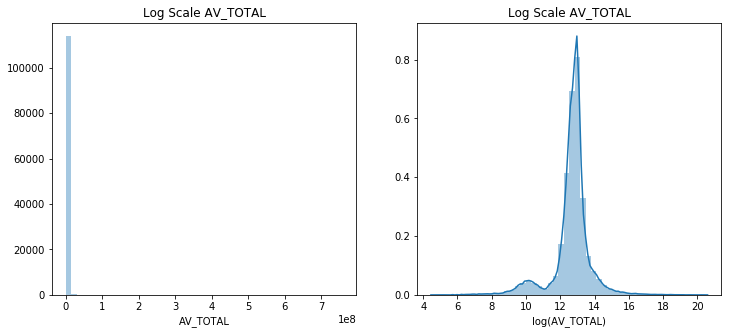

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Log Scale AV_TOTAL')
sns.distplot(df_2008['AV_TOTAL'],kde=False)
plt.subplot(122)
sns.distplot(np.log(df_2008['AV_TOTAL']))
plt.xlabel('log(AV_TOTAL)')
plt.title('Log Scale AV_TOTAL');

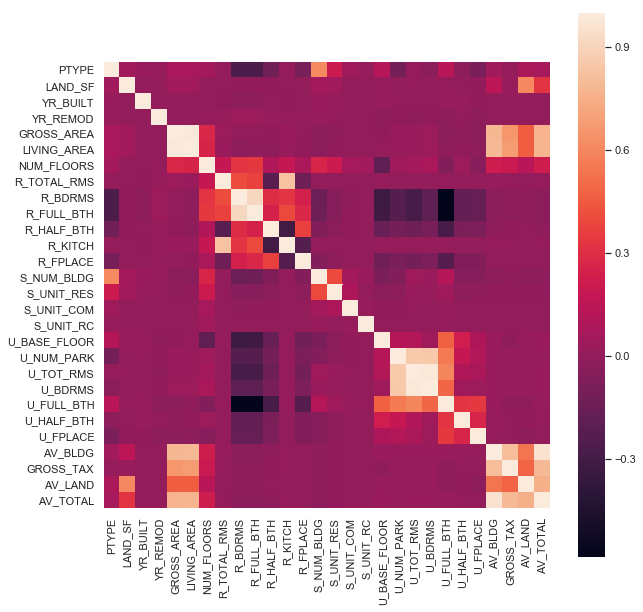

In [11]:
plt.figure(figsize=(10,10))
corr = train_2008.select_dtypes(include = ['float64', 'int64']).iloc[:,1:].corr()
sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True);

In [12]:
corr_list = corr['AV_TOTAL'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

AV_BLDG         0.960526
GROSS_TAX       0.793814
LIVING_AREA     0.772626
GROSS_AREA      0.764628
AV_LAND         0.753586
LAND_SF         0.318254
NUM_FLOORS      0.213132
PTYPE           0.066178
U_BASE_FLOOR    0.023779
U_TOT_RMS       0.018269
U_BDRMS         0.017430
U_NUM_PARK      0.014204
U_FULL_BTH      0.008561
U_HALF_BTH      0.007754
R_TOTAL_RMS     0.006933
R_KITCH         0.005316
YR_BUILT        0.001038
YR_REMOD        0.000236
U_FPLACE       -0.000216
S_UNIT_RC      -0.000480
S_UNIT_COM     -0.001574
R_FPLACE       -0.002441
S_UNIT_RES     -0.007340
R_HALF_BTH     -0.011602
S_NUM_BLDG     -0.022255
R_FULL_BTH     -0.024613
R_BDRMS        -0.027931
Name: AV_TOTAL, dtype: float64

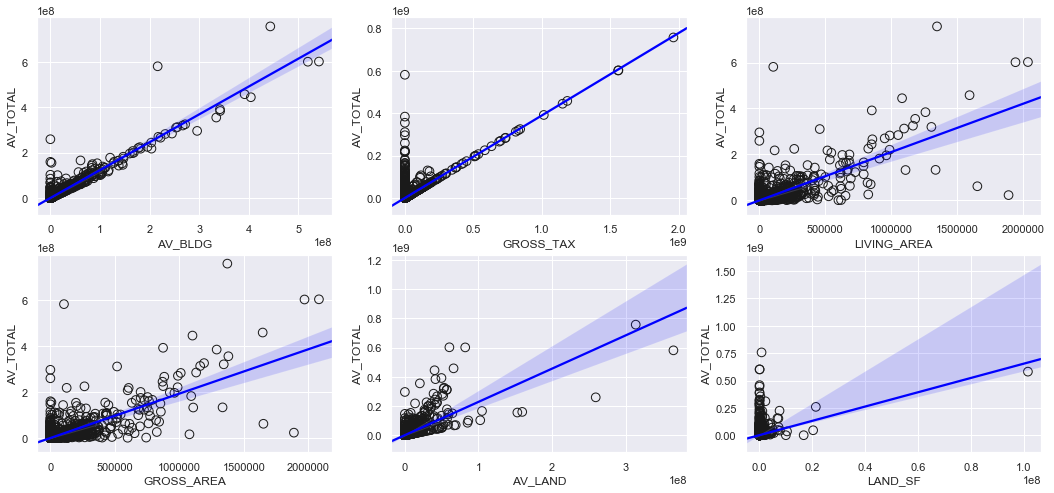

In [15]:
plt.figure(figsize=(18,8))
for i in range(6):
    ii = '23'+str(i+1)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(train_2008[feature], train_2008['AV_TOTAL'], facecolors='none',edgecolors='k',s = 75)
    sns.regplot(x = feature, y = 'AV_TOTAL', data = train_2008,scatter=False, color = 'Blue')
    ax=plt.gca() 
#    ax.set_ylim([0,800000])

In [121]:
categorical_features = train_2008.select_dtypes(include = ['object']).columns

In [122]:
train_2008_categorical = train_2008[categorical_features]

In [123]:
train_2008_categorical.head()

,PID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,LU,OWN_OCC,OWNER,MAIL_ADDRESS,MAIL CS,...,S_BLDG_STYL,S_EXT_FIN,U_CORNER,U_ORIENT,U_HEAT_TYP,U_AC,U_KITCH_TYPE,STRUCTURE_CLASS,LatLong,GIS_ID
0,0100001000_,195,LEXINGTON,ST,0,R3,Y,PASCUCCI CARLO,195 LEXINGTON ST,EAST BOSTON MA,...,0,0,0,0,0,N,0,R,nan|nan,1102128015_
1,0100002000_,197,BROOKLINE,AV,0,R3,N,"ATANASOV, DANIEL",197 LEXINGTON ST,EAST BOSTON MA,...,0,0,0,0,0,N,0,R,nan|nan,1702569000_
2,0100003000_,199,LEXINGTON,ST,0,R3,N,GUERRA ANA S,199 LEXINGTON ST,EAST BOSTON MA,...,0,0,0,0,0,N,0,R,42.2721229397|-71.0779526633,1800079000_
3,0100004000_,201,LEXINGTON,ST,0,R3,N,"MADDALENI JAMES E, TS",PO BOX 557,EVERETT MA,...,0,0,0,0,0,N,0,R,42.268792190700005|-71.0926506592,1801014000_
4,0100005000_,203,LEXINGTON,ST,0,R2,Y,DIGIROLAMO JOHN F TS,203 LEXINGTON ST,EAST BOSTON MA,...,0,0,0,0,0,N,0,R,42.2701646032|-71.1030902067,1802070000_


In [124]:
train_2008_categorical.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF', 'UNIT_NUM', 'LU', 'OWN_OCC',
       'OWNER', 'MAIL_ADDRESS', 'MAIL CS', 'MAIL_ZIPCODE', 'R_BLDG_STYL',
       'R_ROOF_TYP', 'R_EXT_FIN', 'R_HEAT_TYP', 'R_AC', 'S_BLDG_STYL',
       'S_EXT_FIN', 'U_CORNER', 'U_ORIENT', 'U_HEAT_TYP', 'U_AC',
       'U_KITCH_TYPE', 'STRUCTURE_CLASS', 'LatLong', 'GIS_ID'],
      dtype='object')

In [125]:
categoricals_to_drop = ['PID','OWNER','ST_NUM','ST_NAME','ST_NAME_SUF','UNIT_NUM','MAIL_ADDRESS','MAIL CS','MAIL_ZIPCODE', 'LatLong', 'GIS_ID']

### Should we keep 'PID' because we can merge the two dataframes back together eventually? And 'OWNER' might be useful in terms of looking at how properties might increase in value over time steps.

In [126]:
train_2008_categorical.drop(categoricals_to_drop, axis = 1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [127]:
train_2008_categorical.head()

,LU,OWN_OCC,R_BLDG_STYL,R_ROOF_TYP,R_EXT_FIN,R_HEAT_TYP,R_AC,S_BLDG_STYL,S_EXT_FIN,U_CORNER,U_ORIENT,U_HEAT_TYP,U_AC,U_KITCH_TYPE,STRUCTURE_CLASS
0,R3,Y,DK,F,A,W,N,0,0,0,0,0,N,0,R
1,R3,N,RM,F,M,F,Y,0,0,0,0,0,N,0,R
2,R3,N,RM,F,M,S,N,0,0,0,0,0,N,0,R
3,R3,N,RM,M,M,W,N,0,0,0,0,0,N,0,R
4,R2,Y,RE,M,M,W,N,0,0,0,0,0,N,0,R


In [128]:
train_2008_dummied = pd.get_dummies(train_2008_categorical)

In [129]:
train_2008_dummied.head()

,LU_A,LU_AH,LU_C,LU_CC,LU_CD,LU_CL,LU_CM,LU_CP,LU_E,LU_EA,...,U_KITCH_TYPE_F,U_KITCH_TYPE_N,U_KITCH_TYPE_O,U_KITCH_TYPE_P,STRUCTURE_CLASS_A,STRUCTURE_CLASS_B,STRUCTURE_CLASS_C,STRUCTURE_CLASS_D,STRUCTURE_CLASS_E,STRUCTURE_CLASS_R
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [130]:
numeric_features = train_2008.select_dtypes(include = ['float64', 'int64']).columns

In [131]:
train_2008_numeric = train_2008[numeric_features]

In [132]:
train_2008_numeric.columns

Index(['ZIPCODE', 'PTYPE', 'LAND_SF', 'YR_BUILT', 'YR_REMOD', 'GROSS_AREA',
       'LIVING_AREA', 'NUM_FLOORS', 'R_TOTAL_RMS', 'R_BDRMS', 'R_FULL_BTH',
       'R_HALF_BTH', 'R_KITCH', 'R_FPLACE', 'S_NUM_BLDG', 'S_UNIT_RES',
       'S_UNIT_COM', 'S_UNIT_RC', 'U_BASE_FLOOR', 'U_NUM_PARK', 'U_TOT_RMS',
       'U_BDRMS', 'U_FULL_BTH', 'U_HALF_BTH', 'U_FPLACE', 'AV_BLDG',
       'GROSS_TAX', 'AV_LAND', 'AV_TOTAL'],
      dtype='object')

In [133]:
numeric_drop_list = ['ZIPCODE','AV_TOTAL','GROSS_TAX','AV_LAND', 'AV_BLDG']
#numeric_drop_list = ['ZIPCODE','AV_TOTAL']

In [134]:
train_2008_numeric.drop(numeric_drop_list, axis = 1, inplace = True)

In [135]:
train_2008_numeric.head()

,PTYPE,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS,R_TOTAL_RMS,R_BDRMS,R_FULL_BTH,...,S_UNIT_RES,S_UNIT_COM,S_UNIT_RC,U_BASE_FLOOR,U_NUM_PARK,U_TOT_RMS,U_BDRMS,U_FULL_BTH,U_HALF_BTH,U_FPLACE
0,105,1150.0,1900.0,2000.0,3353.0,2202.0,3.0,12.0,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,105,1150.0,1920.0,2000.0,3323.0,2307.0,3.0,9.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,105,1150.0,1905.0,1985.0,3392.0,2268.0,3.0,13.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105,1150.0,1900.0,1991.0,3108.0,2028.0,3.0,11.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,104,2010.0,1900.0,1978.0,3700.0,2546.0,3.0,13.0,6.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
train_2008_numeric.shape

(119727, 24)

## Merge the two dfs

In [137]:
X_ = pd.concat([train_2008_numeric, train_2008_dummied], axis = 1)

In [138]:
X_.shape

(119727, 148)

In [139]:
X = X_
y_total = train_2008['AV_TOTAL']
y_tax = train_2008['GROSS_TAX']
y_land = train_2008['AV_LAND']
y_bldg = train_2008['AV_BLDG']

In [157]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_total,
                                                    random_state = 42)

#Scale Data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [158]:
def runGSAndGetRMSE(est, params):
#    gs = GridSearchCV(est, param_grid = params, verbose=0, scoring='neg_mean_squared_error')
    gs = GridSearchCV(est, param_grid = params, verbose=0, scoring='r2')
    gs.fit(X_train_ss, y_train)
#    print(np.sqrt(gs.best_score_*-1))
    print(np.sqrt(gs.best_score_))
    print(gs.best_params_)
    return gs.best_estimator_

In [159]:
#Lasso
#lassoParams = {'alpha':[0.0001, 0.001, .01, 0.1, 1, 10, 100, 1000]}
#bestLassoEst = runGSAndGetRMSE(Lasso(), lassoParams)

In [160]:
#lasso_coef = bestLassoEst.coef_
#coef_df = pd.DataFrame({'feature': X_train.columns, 'weight': lasso_coef})
#coef_df = coef_df.sort_values(by='weight', ascending=False)
#coef_df.head()

In [161]:
#fig, ax = plt.subplots(1,1, figsize=(12, 10))
#coef_df.iloc[:20, :].plot(kind='barh', x='feature', y='weight', ax=ax, fontsize = 10)
#_= ax.set_title("Lasso coefficients", fontsize=16)
#plt.tight_layout()

In [162]:
#Ridge
ridgeParams = {'alpha':[0.0001, 0.001, .01, 0.1, 1, 10, 100, 1000]}
bestRidgeEst = runGSAndGetRMSE(Ridge(), ridgeParams);

0.7914677442699392
{'alpha': 1000}


In [119]:
ridge_coef = bestRidgeEst.coef_
coef_df_ = pd.DataFrame({'feature': X_train.columns, 'weight': ridge_coef})
coef_df_ = coef_df_.sort_values(by='weight', ascending=False)
coef_df_.head()

,feature,weight
24,AV_BLDG,5.082457e+06
26,AV_LAND,2.162334e+06
43,LU_RL,1.213672e-01
31,LU_CD,1.058589e-01
67,R_ROOF_TYP_G,8.892683e-02


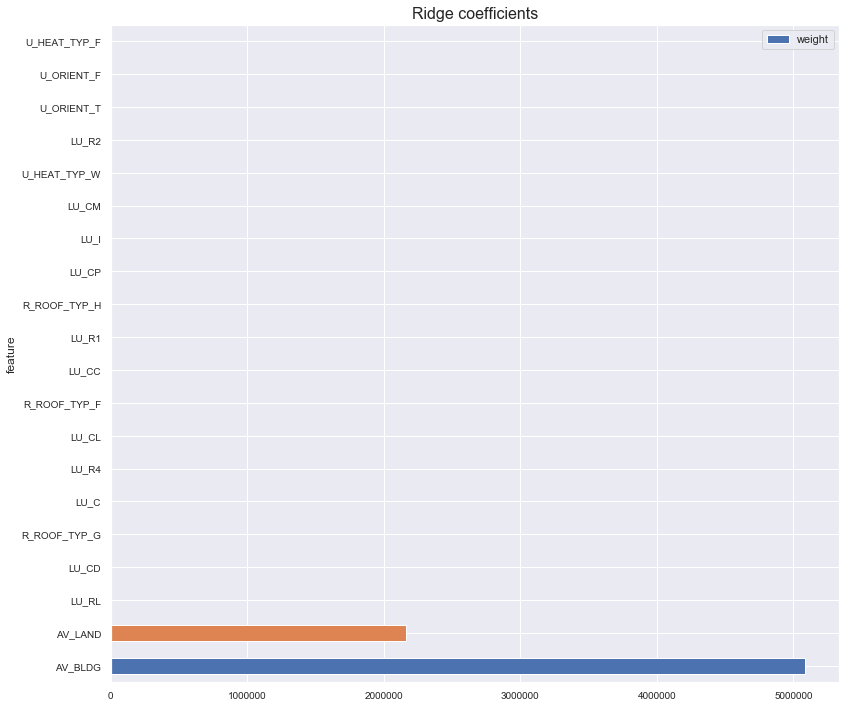

In [120]:
fig, ax = plt.subplots(1,1, figsize=(12, 10))
coef_df_.iloc[:20, :].plot(kind='barh', x='feature', y='weight', ax=ax, fontsize = 10)
_= ax.set_title("Ridge coefficients", fontsize=16)
plt.tight_layout()

In [64]:
train_2008['AV_TOTAL'].mean()

728380.0612727288

In [69]:
import datetime
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, LassoCV,LassoLarsCV, ElasticNet
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [70]:
def mean_squared_error_(ground_truth, predictions):
    return mean_squared_error(ground_truth, predictions) ** 0.5
RMSE = make_scorer(mean_squared_error_, greater_is_better=False)

In [86]:
def model_random_forecast(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain
    rfr = RandomForestRegressor(n_jobs=1, random_state=0)
    param_grid = {'n_estimators': [5],  
                  'max_depth':[10]}
    model = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=1, cv=3, scoring='r2')
    model.fit(X_train, y_train)
    print('Random forecast regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

def model_gradient_boosting_tree(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain 
    gbr = GradientBoostingRegressor(random_state=0)
    param_grid = {
 #       'n_estimators': [148],
 #       'max_features': [10,15],
#	'max_depth': [6,8,10],
 #       'learning_rate': [0.05,0.1,0.15],
  #      'subsample': [0.8]
    }
    model = GridSearchCV(estimator=gbr, param_grid=param_grid, n_jobs=1, cv=3, scoring='r2')
    model.fit(X_train, y_train)
    print('Gradient boosted tree regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

def model_xgb_regression(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain 
    
    xgbreg = xgb.XGBRegressor(seed=0)
    param_grid = {
#        'n_estimators': [148],
#        'learning_rate': [ 0.05],
#        'max_depth': [ 7, 9, 11]
#        'subsample': [ 0.8],
#        'colsample_bytree': [0.75,0.8,0.85],
    }
    model = GridSearchCV(estimator=xgbreg, param_grid=param_grid, n_jobs=1, cv=3, scoring='r2')
    model.fit(X_train, y_train)
    print('eXtreme Gradient Boosting regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

def model_extra_trees_regression(Xtrain,Xtest,ytrain):
    
    X_train = Xtrain
    y_train = ytrain
    
    etr = ExtraTreesRegressor(n_jobs=1, random_state=0)
    param_grid = {}#'n_estimators': [500], 'max_features': [10,15,20]}
    model = GridSearchCV(estimator=etr, param_grid=param_grid, n_jobs=1, cv=3, scoring='r2')
    model.fit(X_train, y_train)
    print('Extra trees regression...')
    print('Best Params:')
    print(model.best_params_)
    print('Best CV Score:')
    print(-model.best_score_)

    y_pred = model.predict(Xtest)
    return y_pred, -model.best_score_

In [84]:
model_random_forecast(X_train_ss, X_test_ss, y_train)

Random forecast regression...
Best Params:
{'max_depth': 10, 'n_estimators': 5}
Best CV Score:
0.5751102827654303


(array([294407.58858632, 482248.04494931, 482248.04494931, ...,
        244203.66534226, 294407.58858632, 334398.6734854 ]),
 -0.5751102827654303)

In [87]:
#test_predict,score = model_random_forecast(X_train,X_test,y_train)
test_predict,score = model_xgb_regression(X_train,X_test,y_train)
#test_predict,score = model_extra_trees_regression(X_train,X_test,y_train)
#test_predict,score = model_gradient_boosting_tree(X_train,X_test,y_train)

eXtreme Gradient Boosting regression...
Best Params:
{}
Best CV Score:
-0.5540971088728454
